# Load the Dataset

In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'text'])
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


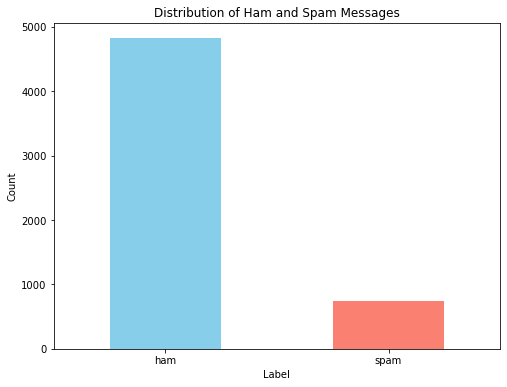

In [5]:
import matplotlib.pyplot as plt

# Count the occurrences of each label (ham and spam)
label_counts = data['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Exploratory Data Analysis

### Check for Missing Values

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
label    0
text     0
dtype: int64


### Basic Statistics (Text Length)

In [7]:
# Add a column for message length
data['text_length'] = data['text'].apply(len)

# Show basic statistics for text length
print("\nBasic statistics for text length:")
print(data['text_length'].describe())


Basic statistics for text length:
count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: text_length, dtype: float64


### Visualize Text Length Distribution

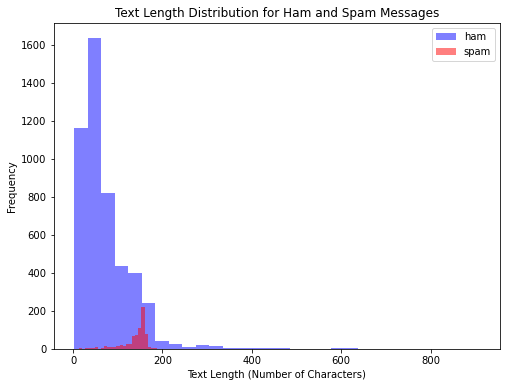

In [8]:
# Plot the distribution of text lengths for ham and spam
plt.figure(figsize=(8, 6))
data[data['label'] == 'ham']['text_length'].plot(kind='hist', alpha=0.5, label='ham', bins=30, color='blue')
data[data['label'] == 'spam']['text_length'].plot(kind='hist', alpha=0.5, label='spam', bins=30, color='red')
plt.title('Text Length Distribution for Ham and Spam Messages')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Check Duplication

In [17]:
# Check for duplicates
duplicates = data[data.duplicated(subset=['text'])]
print(f"\nNumber of duplicate messages: {duplicates.shape[0]}")


Number of duplicate messages: 403


In [21]:
# Keep only the first occurrence of each message
data_unique = data.drop_duplicates(subset=['text'], keep='first')

# Verify the new dataset size
print(f"Original dataset size: {data.shape[0]}")
print(f"Dataset size after keeping only the first occurrence: {data_unique.shape[0]}")

Original dataset size: 5572
Dataset size after keeping only the first occurrence: 5169


### Top 10 Most Common Words in Spam vs. Ham

In [22]:
from collections import Counter
import re

# Function to clean text (removing non-alphabetic characters)
def clean_text(text):
    return ' '.join(re.findall(r'\b\w+\b', text.lower()))

# Get top 10 words in ham and spam messages
ham_cleaned = ' '.join(data_unique[data_unique['label'] == 'ham']['text'].apply(clean_text))
spam_cleaned = ' '.join(data_unique[data_unique['label'] == 'spam']['text'].apply(clean_text))

ham_word_count = Counter(ham_cleaned.split())
spam_word_count = Counter(spam_cleaned.split())

# Get top 10 most common words
ham_top_10 = ham_word_count.most_common(10)
spam_top_10 = spam_word_count.most_common(10)

print("\nTop 10 words in Ham messages:")
print(ham_top_10)
print("\nTop 10 words in Spam messages:")
print(spam_top_10)


Top 10 words in Ham messages:
[('i', 2793), ('you', 1880), ('to', 1481), ('the', 1062), ('a', 975), ('u', 930), ('and', 826), ('in', 762), ('me', 732), ('my', 679)]

Top 10 words in Spam messages:
[('to', 599), ('a', 335), ('call', 309), ('you', 268), ('your', 242), ('free', 195), ('2', 185), ('for', 185), ('the', 183), ('now', 164)]


### Check Data Imbalance

In [23]:
# Check for class imbalance
class_distribution = data_unique['label'].value_counts(normalize=True)
print("\nClass distribution (ham vs. spam):")
print(class_distribution)


Class distribution (ham vs. spam):
ham     0.87367
spam    0.12633
Name: label, dtype: float64


# Preprocess Data

In [24]:
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [25]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (you only need to run this once)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanfei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# Initialize the stemmer and stopwords list
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing function
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenize the text
    words = text.split()
    
    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # 5. Apply stemming
    words = [stemmer.stem(word) for word in words]
    
    # Join words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to the 'text' column
data_unique['text_cleaned'] = data_unique['text'].apply(preprocess_text)

# Display the first few rows of the cleaned text
data_unique[['text', 'text_cleaned']].head()

<ipython-input-26-c3b926bc93b6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique['text_cleaned'] = data_unique['text'].apply(preprocess_text)


,text,text_cleaned
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


### Apply TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features

# Transform the cleaned text into TF-IDF features
X = vectorizer.fit_transform(data_unique['text_cleaned'])

# Convert the result into a DataFrame to inspect
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF matrix
print(X_df.head())

    aa  aah  abi  abil  abiola  abj  abl  abt  abta  aburo  ...  zebra  zed  \
0  0.0  0.0  0.0   0.0     0.0  0.0  0.0  0.0   0.0    0.0  ...    0.0  0.0   
1  0.0  0.0  0.0   0.0     0.0  0.0  0.0  0.0   0.0    0.0  ...    0.0  0.0   
2  0.0  0.0  0.0   0.0     0.0  0.0  0.0  0.0   0.0    0.0  ...    0.0  0.0   
3  0.0  0.0  0.0   0.0     0.0  0.0  0.0  0.0   0.0    0.0  ...    0.0  0.0   
4  0.0  0.0  0.0   0.0     0.0  0.0  0.0  0.0   0.0    0.0  ...    0.0  0.0   

   zero   zf  zhong  zindgi  zoe  zogtoriu  zoom  zouk  
0   0.0  0.0    0.0     0.0  0.0       0.0   0.0   0.0  
1   0.0  0.0    0.0     0.0  0.0       0.0   0.0   0.0  
2   0.0  0.0    0.0     0.0  0.0       0.0   0.0   0.0  
3   0.0  0.0    0.0     0.0  0.0       0.0   0.0   0.0  
4   0.0  0.0    0.0     0.0  0.0       0.0   0.0   0.0  

[5 rows x 5000 columns]


### Prepare the Target Labels

In [28]:
# Assign the target variable (label)
y = data_unique['label']

# Display the first few target values
print(y.head())


0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object


### Split the Data into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

# First split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Display the shapes of the datasets
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 3721
Validation set size: 414
Test set size: 1034


# Train the Model

### Naive Bayes Model

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model using the training data
nb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Display the classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9541

Classification Report (Validation Set):
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       354
        spam       1.00      0.68      0.81        60

    accuracy                           0.95       414
   macro avg       0.97      0.84      0.89       414
weighted avg       0.96      0.95      0.95       414



In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Initialize GridSearchCV with Naive Bayes
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best alpha: {grid_search.best_params_}")

# Use the best model found by GridSearchCV
best_nb_model = grid_search.best_estimator_

# Evaluate the tuned model on the validation set
y_val_pred_tuned = best_nb_model.predict(X_val)
val_accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
print(f"Tuned Validation Accuracy: {val_accuracy_tuned:.4f}")

Best alpha: {'alpha': 0.1}
Tuned Validation Accuracy: 0.9710


In [33]:
# Make predictions on the test set
y_test_pred = nb_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9652

Classification Report (Test Set):
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       894
        spam       1.00      0.74      0.85       140

    accuracy                           0.97      1034
   macro avg       0.98      0.87      0.92      1034
weighted avg       0.97      0.97      0.96      1034



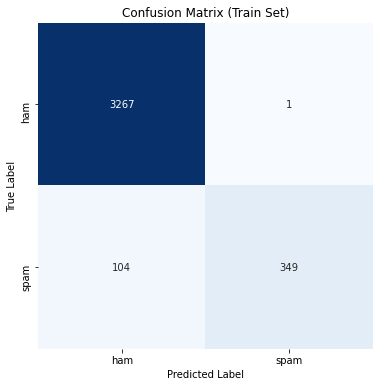

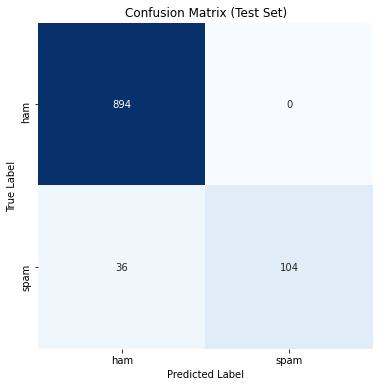

In [34]:
# Generate confusion matrix for the training set
y_train_pred = nb_model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

# Generate confusion matrix for the test set
y_test_pred = nb_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_train, "Confusion Matrix (Train Set)")
plot_confusion_matrix(cm_test, "Confusion Matrix (Test Set)")

### Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [36]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Validation Accuracy (Random Forest): {val_accuracy_rf:.4f}")

# Display the classification report
print("\nClassification Report (Validation Set - Random Forest):")
print(classification_report(y_val, y_val_pred_rf))

Validation Accuracy (Random Forest): 0.9614

Classification Report (Validation Set - Random Forest):
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       354
        spam       0.98      0.75      0.85        60

    accuracy                           0.96       414
   macro avg       0.97      0.87      0.91       414
weighted avg       0.96      0.96      0.96       414



In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best parameters (Random Forest): {grid_search_rf.best_params_}")

# Use the best model found by GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the tuned model on the validation set
y_val_pred_rf_tuned = best_rf_model.predict(X_val)
val_accuracy_rf_tuned = accuracy_score(y_val, y_val_pred_rf_tuned)
print(f"Tuned Validation Accuracy (Random Forest): {val_accuracy_rf_tuned:.4f}")

Best parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Validation Accuracy (Random Forest): 0.9589


In [39]:
# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy (Random Forest): {test_accuracy_rf:.4f}")

# Display the classification report for the test set
print("\nClassification Report (Test Set - Random Forest):")
print(classification_report(y_test, y_test_pred_rf))

Test Accuracy (Random Forest): 0.9739

Classification Report (Test Set - Random Forest):
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       894
        spam       1.00      0.81      0.89       140

    accuracy                           0.97      1034
   macro avg       0.99      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



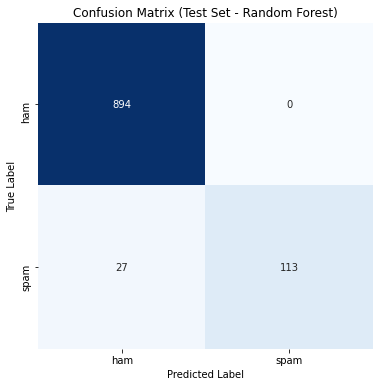

In [40]:
# Generate confusion matrix for the test set
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Plot confusion matrix for Random Forest
plot_confusion_matrix(cm_test_rf, "Confusion Matrix (Test Set - Random Forest)")

# Logsitic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [42]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_log_reg = log_reg_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy_log_reg = accuracy_score(y_val, y_val_pred_log_reg)
print(f"Validation Accuracy (Logistic Regression): {val_accuracy_log_reg:.4f}")

# Display the classification report
print("\nClassification Report (Validation Set - Logistic Regression):")
print(classification_report(y_val, y_val_pred_log_reg))

Validation Accuracy (Logistic Regression): 0.9348

Classification Report (Validation Set - Logistic Regression):
              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       354
        spam       0.97      0.57      0.72        60

    accuracy                           0.93       414
   macro avg       0.95      0.78      0.84       414
weighted avg       0.94      0.93      0.93       414



In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV with Logistic Regression
grid_search_log_reg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_log_reg, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_log_reg.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best parameters (Logistic Regression): {grid_search_log_reg.best_params_}")

# Use the best model found by GridSearchCV
best_log_reg_model = grid_search_log_reg.best_estimator_

# Evaluate the tuned model on the validation set
y_val_pred_log_reg_tuned = best_log_reg_model.predict(X_val)
val_accuracy_log_reg_tuned = accuracy_score(y_val, y_val_pred_log_reg_tuned)
print(f"Tuned Validation Accuracy (Logistic Regression): {val_accuracy_log_reg_tuned:.4f}")

Best parameters (Logistic Regression): {'C': 10, 'solver': 'liblinear'}
Tuned Validation Accuracy (Logistic Regression): 0.9686


In [44]:
# Make predictions on the test set
y_test_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
print(f"Test Accuracy (Logistic Regression): {test_accuracy_log_reg:.4f}")

# Display the classification report for the test set
print("\nClassification Report (Test Set - Logistic Regression):")
print(classification_report(y_test, y_test_pred_log_reg))

Test Accuracy (Logistic Regression): 0.9536

Classification Report (Test Set - Logistic Regression):
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       894
        spam       0.96      0.69      0.80       140

    accuracy                           0.95      1034
   macro avg       0.96      0.84      0.89      1034
weighted avg       0.95      0.95      0.95      1034



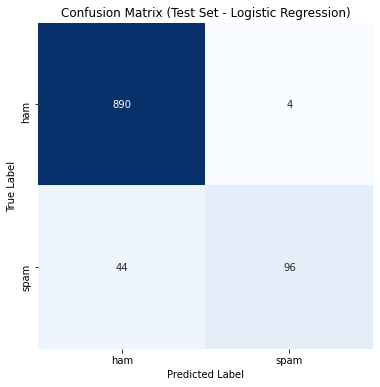

In [45]:
# Generate confusion matrix for the test set
cm_test_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(cm_test_log_reg, "Confusion Matrix (Test Set - Logistic Regression)")